Лабораторная работа No4
Тема "Конечный автомат с магазинной памятью" (20 баллов)

1. Построить конечный автомат с магазинной памятью (КАМП) в виде объекта программы.
2. Реализовать процедуру/метод проверки баланса различного вида скобок (или других ограничителей) с помощью КАМП во входной цепочке символов.
3. Реализовать процедуру/метод построения дерева по входящей цепочке символов различных типов скобок. Дерево должно отражать отношение вложенности скобок.
4. Нарисовать граф переходов КАМП


In [22]:
import networkx as nx


class Transition:
    def __init__(
        self,
        current_state: int,
        next_state: int,
        rule: str,
        payload: str = None,
    ):
        self.current_state = current_state
        self.next_state = next_state
        self.rule = rule
        self.payload = payload


class PDA:
    def __init__(
        self,
    ) -> None:
        self.transitions: list[Transition] = []
        self.states = {}
        self.initial_state = None
        self.final_state = None
        self.current_state = None
        self.stack = []

    def add_transition(self, transition: Transition):
        current_state = transition.current_state
        next_state = transition.next_state
        rule = transition.rule
        if self.states.get(current_state, None) is None:
            self.states[current_state] = {}
        self.states[current_state][rule] = transition

    def delete_transition(self, transition: Transition):
        current_state = transition.current_state
        rule = transition.rule
        if current_state in self.states:
            if rule in self.states[current_state]:
                del self.states[current_state][rule]

    def set_initial_state(self, state_num: int):
        # если начальное состояние неопределено
        # тогда при его определении, текущее становится равно начальному
        if self.initial_state is None:
            self.current_state = state_num
        self.initial_state = state_num

    def set_final_state(self, state_num: int):
        self.final_state = state_num

    def delete_initial_state(self):
        self.initial_state = None

    def delete_final_state(self):
        self.final_state = None

    def move(self, rule: str):
        if not self.current_state is None:
            if rule in self.states[self.current_state]:
                next_state = self.states[self.current_state][rule]
                payload = next_state.payload
                if str(payload) in "([":
                    self.stack.append(payload)
                if len(self.stack) > 0:
                    if self.stack[-1] == "(" and payload == ")":
                        self.stack.pop()
                    elif self.stack[-1] == "[" and payload == "]":
                        self.stack.pop()
                self.current_state = next_state.next_state
        else:
            print("Please add initial state!")

    def match_word(self, word: str):
        print(self.current_state)
        current_word = ""
        for w in word:
            current_word += w
            print("prev=", self.current_state)
            self.move(w)
            print(current_word)
            print("after=", self.current_state)
            print("---")

        print("RES=", self.current_state)
        print("STACK=", self.stack)
        if len(self.stack) == 0:
            self.current_state = 2
            return True
        else:
            return False


fsm_1 = PDA()
transitions = [
    Transition(current_state=1, next_state=1, rule="(", payload="("),
    Transition(current_state=1, next_state=1, rule="1", payload=None),
    Transition(current_state=1, next_state=1, rule="+", payload=None),
    Transition(current_state=1, next_state=1, rule="*", payload=None),
    Transition(current_state=1, next_state=1, rule=")", payload=")"),
    Transition(current_state=1, next_state=1, rule="[", payload="["),
    Transition(current_state=1, next_state=1, rule="]", payload="]"),
]


for transition in transitions:
    fsm_1.add_transition(transition=transition)

fsm_1.set_initial_state(state_num=1)
fsm_1.set_final_state(state_num=2)


def example_1():
    word = "(1+1)*[111+11]*([[11]+1]*1)"
    print(fsm_1.match_word(word=word))


def example_2():
    word = "(1+1)*[111+11]*([[[11]+1]*1)"
    print(fsm_1.match_word(word=word))


# example_1()
example_2()

1
prev= 1
(
after= 1
---
prev= 1
(1
after= 1
---
prev= 1
(1+
after= 1
---
prev= 1
(1+1
after= 1
---
prev= 1
(1+1)
after= 1
---
prev= 1
(1+1)*
after= 1
---
prev= 1
(1+1)*[
after= 1
---
prev= 1
(1+1)*[1
after= 1
---
prev= 1
(1+1)*[11
after= 1
---
prev= 1
(1+1)*[111
after= 1
---
prev= 1
(1+1)*[111+
after= 1
---
prev= 1
(1+1)*[111+1
after= 1
---
prev= 1
(1+1)*[111+11
after= 1
---
prev= 1
(1+1)*[111+11]
after= 1
---
prev= 1
(1+1)*[111+11]*
after= 1
---
prev= 1
(1+1)*[111+11]*(
after= 1
---
prev= 1
(1+1)*[111+11]*([
after= 1
---
prev= 1
(1+1)*[111+11]*([[
after= 1
---
prev= 1
(1+1)*[111+11]*([[[
after= 1
---
prev= 1
(1+1)*[111+11]*([[[1
after= 1
---
prev= 1
(1+1)*[111+11]*([[[11
after= 1
---
prev= 1
(1+1)*[111+11]*([[[11]
after= 1
---
prev= 1
(1+1)*[111+11]*([[[11]+
after= 1
---
prev= 1
(1+1)*[111+11]*([[[11]+1
after= 1
---
prev= 1
(1+1)*[111+11]*([[[11]+1]
after= 1
---
prev= 1
(1+1)*[111+11]*([[[11]+1]*
after= 1
---
prev= 1
(1+1)*[111+11]*([[[11]+1]*1
after= 1
---
prev= 1
(1+1)*[111+11]*([[

In [23]:
word = "(1+1)*[111+11]*([[11]+1]*1)"

tree = fsm_1.build_tree(word)
print(tree.edges())

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]


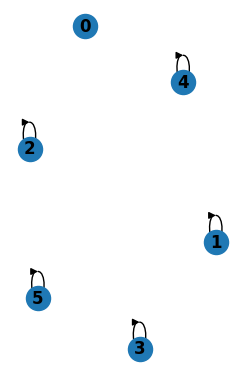

In [24]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(tree, with_labels=True, font_weight="bold")